In [16]:
sentences = [  
    # Botanic context  
    "I planted a maple tree in the backyard.",  
    "The tree provides shade during hot summer days.",  
    "We sat under the old oak tree.",  
    "The tree blossoms in the spring.",  
    "The apple tree bears fruit every autumn.",  
    "The tree's roots were deep in the ground.",  
    "The tree's leaves turned yellow and fell off.",  
    "The pine tree stood tall in the forest.",  
    "The willow tree hung over the pond.",  
    "The tree was cut down to make room for new construction.",  
      
    # Computer programming context  
    "The binary tree is a fundamental data structure in computer science.",  
    "Each node in the tree stores a piece of data.",  
    "The tree structure allows efficient search and sort operations.",  
    "The tree is traversed in a pre-order, in-order, or post-order manner.",  
    "A balanced binary tree offers optimal performance.",  
    "The tree's root node has no parent.",  
    "Each node in the tree has a link to its parent and children.",  
    "The tree's leaf nodes have no children.",  
    "A tree in computer science is not necessarily rooted.",  
    "The tree algorithm was implemented recursively.",  
      
    # Family tree context  
    "My family tree traces back to the 16th century.",  
    "I am researching my family tree.",  
    "My family tree has branches all over the world.",  
    "The family tree shows our genealogy.",  
    "I found an interesting ancestor in our family tree.",  
    "My family tree is quite complex.",  
    "Our family tree includes several notable individuals.",  
    "The family tree reveals our heritage.",  
    "I discovered distant relatives through the family tree.",  
    "The family tree helps us understand our roots.",  
]  


In [3]:
import os
from sentence_transformers import SentenceTransformer, util

# https://www.sbert.net/docs/pretrained_models.html
transformers_cache = os.environ.get('TRANSFORMERS_CACHE')
print(transformers_cache)


# https://www.sbert.net/docs/pretrained_models.html
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', cache_folder=transformers_cache)
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', cache_folder=transformers_cache)
#model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1', cache_folder=transformers_cache)
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2', cache_folder=transformers_cache)

c:\develop\github\ai-playground\src\python\langchainVarious\langchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


R:\HuggingFace\cache


In [4]:
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Now we want to transform all sentences with bert
embeddings = model.encode(sentences)

# calculate the module of all vectors in embeddings
vectors_module = np.linalg.norm(embeddings, axis=1)
# Verify if the vector are unit vector or not. This is important
# because the cosine similarity is defined as the dot product
# between two unit vectors. If the vectors are not unit vectors
# the cosine similarity cannot be calculated with dot product
pprint(vectors_module)

array([1.        , 0.99999994, 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 0.99999994, 1.        , 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 0.99999994,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ],
      dtype=float32)


In [5]:

#and now I want to print a matrix with the cosine similarity of each sentence with each other sentence
#df = pd.DataFrame(cosine_similarity(embeddings))
df = pd.DataFrame(util.cos_sim(embeddings, embeddings))
dfdot = pd.DataFrame(util.dot_score(embeddings, embeddings))

df.columns = range(len(sentences))
df.index = range(len(sentences))

df


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.379074,0.438231,0.394226,0.349881,0.440442,0.356594,0.377757,0.355876,0.366681,...,0.179801,0.101939,0.263586,0.268386,0.255395,0.191189,0.115045,0.191750,0.259921,0.181078
1,0.379074,1.000000,0.324594,0.478925,0.330001,0.396967,0.373735,0.397548,0.357843,0.395543,...,0.047312,0.111321,0.189122,0.268728,0.120580,0.079022,0.130827,0.174632,0.093574,0.184273
2,0.438231,0.324594,1.000000,0.204113,0.261482,0.469505,0.346595,0.357929,0.379301,0.335733,...,0.184805,0.122329,0.135003,0.268346,0.274595,0.119858,0.124624,0.209225,0.194462,0.173632
3,0.394226,0.478925,0.204113,1.000000,0.478753,0.375137,0.331218,0.343849,0.291768,0.312572,...,0.076369,0.141254,0.208064,0.243591,0.159511,0.110941,0.146727,0.177084,0.116164,0.194286
4,0.349881,0.330001,0.261482,0.478753,1.000000,0.307125,0.340227,0.317161,0.209402,0.245091,...,0.158039,0.172083,0.225358,0.252964,0.188874,0.181409,0.158809,0.237713,0.178584,0.256958
5,0.440442,0.396967,0.469505,0.375137,0.307125,1.000000,0.439137,0.510065,0.364327,0.406206,...,0.203870,0.214643,0.289254,0.268393,0.282609,0.196283,0.164778,0.257354,0.253854,0.340003
6,0.356594,0.373735,0.346595,0.331218,0.340227,0.439137,1.000000,0.323896,0.366478,0.503313,...,0.095690,0.133874,0.184075,0.235226,0.157790,0.124000,0.082462,0.191889,0.181662,0.187443
7,0.377757,0.397548,0.357929,0.343849,0.317161,0.510065,0.323896,1.000000,0.448174,0.411447,...,0.072681,0.107270,0.153033,0.194204,0.147738,0.068517,0.107264,0.134220,0.105911,0.127044
8,0.355876,0.357843,0.379301,0.291768,0.209402,0.364327,0.366478,0.448174,1.000000,0.331057,...,0.137727,0.143783,0.164372,0.236765,0.229736,0.093449,0.143332,0.174167,0.123409,0.167201
9,0.366681,0.395543,0.335733,0.312572,0.245091,0.406206,0.503313,0.411447,0.331057,1.000000,...,0.055208,0.111633,0.077176,0.231224,0.127727,0.031994,0.059000,0.152864,0.057426,0.150793


In [6]:
import umap
import altair as alt
def plot_embeddings(sentences, embeddings):
    panda_sentences = pd.DataFrame({'text':sentences})

    # UMAP reduces dimension to a plottable 2DE
    reducer = umap.UMAP(n_neighbors=2)
    umap_embeds = reducer.fit_transform(embeddings)
    
    # create a dataframe with the umap embeddings and the corresponding sentences
    df_plot = pd.DataFrame({'x': umap_embeds[:, 0], 'y': umap_embeds[:, 1], 'text': panda_sentences['text']})
    
    # create a column to specify the color of each point
    colors = ['blue']*10 + ['red']*10 + ['green']*10
    df_plot['color'] = colors
    
    # create the interactive scatter plot with labels
    return alt.Chart(df_plot, width=1100, height=600).mark_circle(size=60).encode(
        x='x',
        y='y',
        color=alt.Color('color', scale=None),
        tooltip=['text']
    )


In [7]:
# now we can plot the embeddings
chart  = plot_embeddings(sentences, embeddings)

chart.interactive()

alt.Chart(...)

In [8]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
#print out the value of the environment variable OPENAI_API_KEY

from openai import AzureOpenAI
client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
    api_version="2023-12-01-preview",
    azure_endpoint=os.getenv("AZURE_ENDPOINT")
)

embeddings_ada = []

response = client.embeddings.create(
    input=sentences,
        model="text-embedding-ada-002"
)

for data in response.data:
    embeddings_ada.append(data.embedding)

# Now we can plot the embeddings
chart = plot_embeddings(sentences, embeddings_ada)
chart.interactive()


alt.Chart(...)

In [44]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from pprint import pprint
import numpy as np

def openai_plot_2D(embeddings):
    matrix = pd.DataFrame(embeddings)

    # Create a t-SNE model and transform the data
    tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
    vis_dims = tsne.fit_transform(matrix)

    colors = ["red", "blue", "green"]
    x = [x for x,y in vis_dims]
    y = [y for x,y in vis_dims]
    print (matrix.index.values)
    color_indices = np.floor(matrix.index.values / 3)
    print (color_indices)

    colormap = matplotlib.colors.ListedColormap(colors)
    pprint (colormap)
    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
    plt.title("Embedding in 2d")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[0. 0. 0. 1. 1. 1. 2. 2. 2. 3. 3. 3. 4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 7. 7.
 8. 8. 8. 9. 9. 9.]


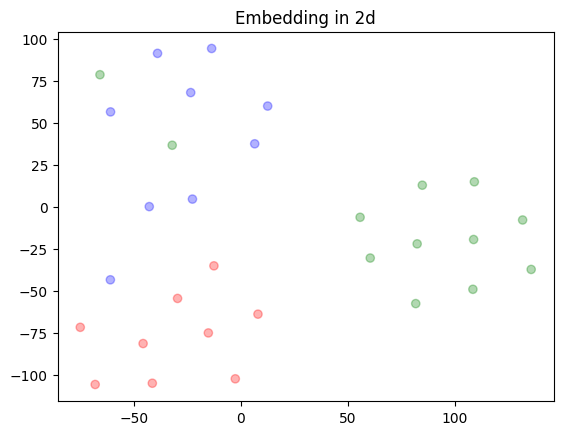

In [45]:
# 2d print as for openai site
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

openai_plot_2D(embeddings_ada)


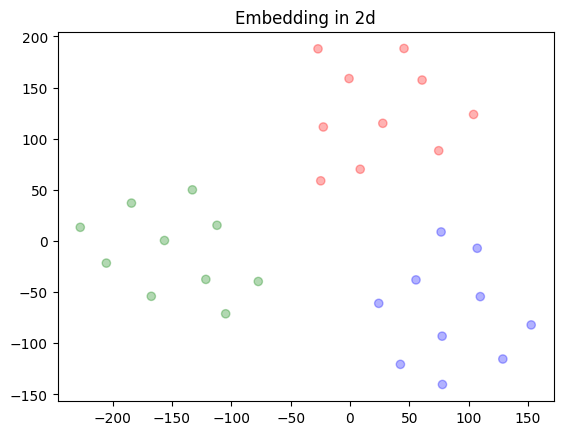

In [11]:
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large = client.embeddings.create(
    input=sentences,
    model="text-embedding-3-large"
)

embeddings_te3_large = []
for data in response_te3_large.data:
    embeddings_te3_large.append(data.embedding)

openai_plot_2D(embeddings_te3_large)


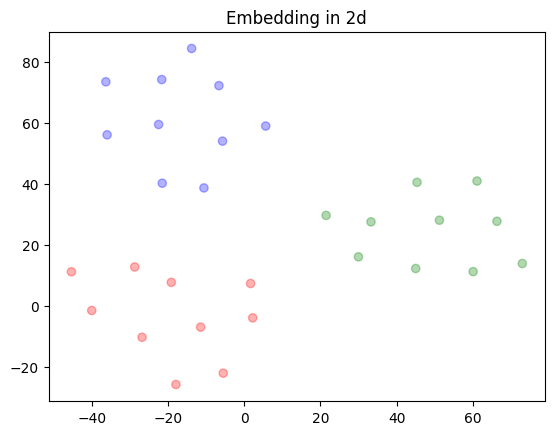

In [12]:
#Now reduce dimensions
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large_512 = client.embeddings.create(
    input=sentences,
    dimensions=512,
    model="text-embedding-3-large"
)

embeddings_te3_large_512 = []
for data in response_te3_large_512.data:
    embeddings_te3_large_512.append(data.embedding)

openai_plot_2D(embeddings_te3_large_512)

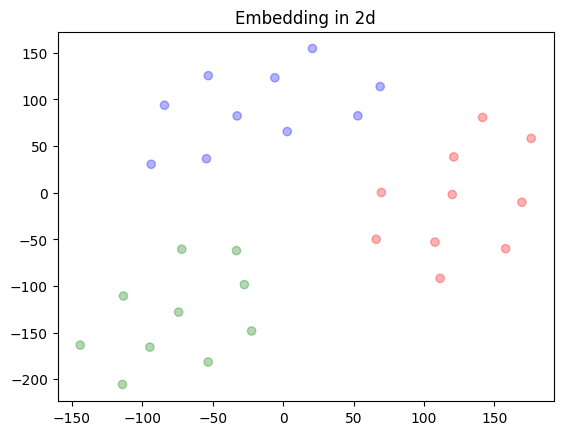

In [13]:
#Now reduce dimensions a lot
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large_128 = client.embeddings.create(
    input=sentences,
    dimensions=128,
    model="text-embedding-3-large"
)

embeddings_te3_large_128 = []
for data in response_te3_large_128.data:
    embeddings_te3_large_128.append(data.embedding)

openai_plot_2D(embeddings_te3_large_128)

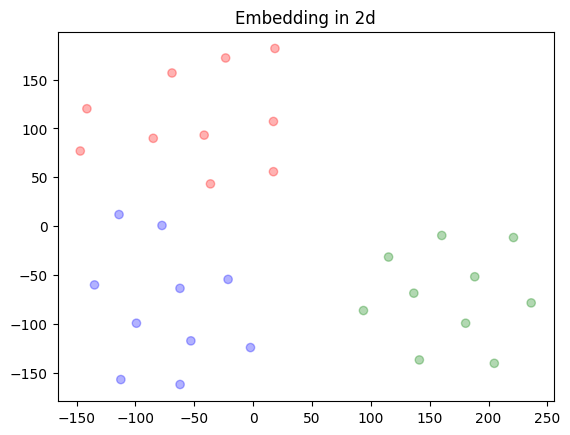

In [17]:
import random
#last time with bert

# Encode the shuffled sentences using the model
embeddings_bert = model.encode(sentences)

# Plot the embeddings in 2D
openai_plot_2D(embeddings_bert)

